<a href="https://colab.research.google.com/github/Simpleshell3/CMR-Land-Sector-Analysis/blob/main/East_Cameroon_Land_Sector_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **East Cameroon Land Sector Analysis**
The aim of this exercise is to provide an extensive report on Land use in East Cameroon as well as outline the various strategies that can be adopted to mitigate and climate change, provide food security and promote biodiversity.

The East Region occupies the southeastern portion of the Republic of Cameroon. It is bordered to the east by the Central African Republic, to the south by Congo, to the north by the Adamawa Region, and to the west by the Centre and South Regions.

In [ ]:
# Installing packages
!pip install geopandas 
!pip install matplotlib
!apt install proj-bin libproj-dev libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install mapclassify
!pip install geoplot
!pip install seaborn
!pip install rasterio
!pip install folium
!pip install ipyleaflet

In [12]:
#Importing packages
from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
 LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
 MarkerCluster, Heatmap,SearchControl, 
 FullScreenControl)
from ipywidgets import Text, HTML
from branca.colormap import linear
import geopandas as gpd
import json
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify as mc
import mapclassify
from mpl_toolkits.basemap import Basemap
import numpy as np
import geoplot
import geoplot.crs as gcrs
import geoplot as gplt
import seaborn as sns
import io
import requests
import rasterio
from rasterio.plot import show
import folium

%matplotlib inline

## **Administrative boundary of East Cameroon**


The East is divided into four departments (departements), each headed by a presidentially appointed senior divisional officer or prefect (prefet):

1. Boumba-et-Ngoko (Boumba and Ngoko) takes up the southeast and has its centre in Yokadouma.
2. Haut-Nyong (Upper Nyong) occupies the southwestern portion and is centred on Abong-Mbang.
3. Kadey (also spelled Kadéï or Kadei) forms the central-eastern portion of the territory and is governed from Batouri.
4. Lom-et-Djérem (Lom and Djérem) consists of the north of the province and has its capital in Bertoua.

Each of these divisions is further divided into sub-divisions, each headed by a sub-divisional officer or sub-prefect (sous-prefet). Individual towns usually have a mayor, and some villages have a traditional chief, though this person usually holds little actual authority.

In [13]:
# Downloading and displaying East Cameroon's Adminitrative Boundaries
url1 = "https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CMR/CMR_AL4_East.json"

a=requests.get(url1).content

df_ecbo = gpd.read_file(io.StringIO(a.decode('utf-8')))
df_ecbo

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,CMR,CM-ES,East,East,Est,,administrative,4,Q845168,fr:Région de l'Est (Cameroun),2019-02-26T08:00:07,"POLYGON ((12.49414 3.88471, 12.49458 3.87706, ..."


In [14]:
m = folium.Map(
    location=[4, 14],
    tiles="cartodbpositron",
    zoom_start=8,
)

folium.GeoJson(url1, name="adminlevel").add_to(m)

folium.LayerControl().add_to(m)


m

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


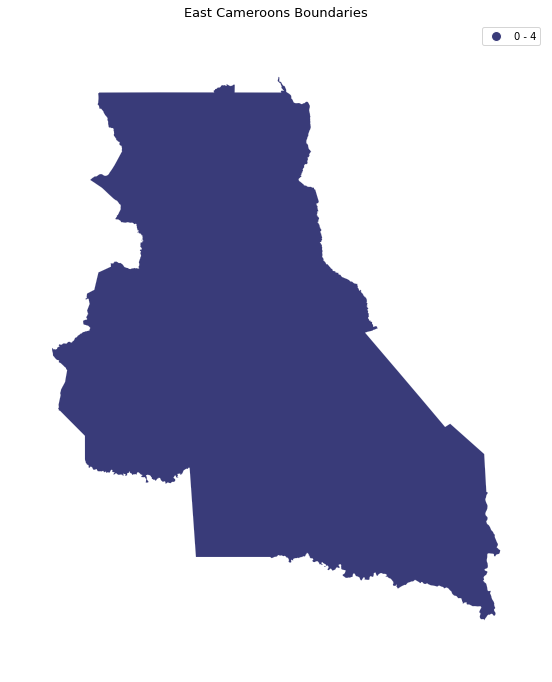

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(df_ecbo['adminlevel'], k=1)
 
 #Map
gplt.choropleth(df_ecbo, 
    hue="adminlevel", 
    linewidth=.1,
    scheme=scheme, cmap='tab20b',
    legend=True,
    edgecolor='white',
    ax=ax
);

ax.set_title('East Cameroon''s Boundaries', fontsize=13);

In [16]:
# Downloading and displaying East Cameroon's Ecological Zones
url2 = "https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CMR/CMR_AL4_East_GEZ.json"

a=requests.get(url2).content

df_ecgez = gpd.read_file(io.StringIO(a.decode('utf-8')))

df_ecgez

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,CMR,CM-ES,East,Tropical moist forest,12,TAwa,4,"POLYGON ((14.41554 6.04468, 14.41251 6.05029, ..."
1,CMR,CM-ES,East,Tropical rainforest,11,TAr,4,"POLYGON ((14.71470 4.77420, 14.63617 4.79564, ..."


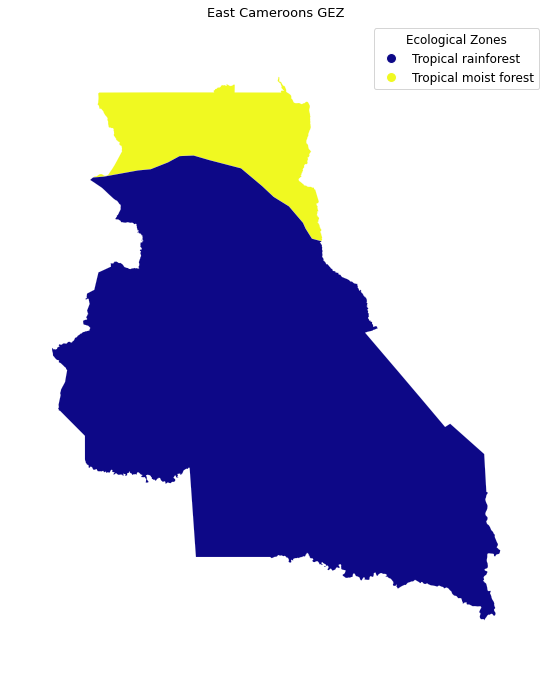

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(df_ecgez['gez_code'], k=2)

 
 #Map
gplt.choropleth(df_ecgez, 
    hue="gez_code", 
    linewidth=.1,
    scheme=scheme, 
    cmap='plasma',
    legend_labels=["Tropical rainforest", "Tropical moist forest"],
    legend_kwargs={"loc":"best","fontsize": "large", "title":"Ecological Zones", "title_fontsize":"large"},
    legend = True,
     figsize=(16,8)
    #legend_values= "gez_name",
    edgecolor='white',
    ax=ax
);

ax.set_title('East Cameroon''s GEZ', fontsize=13);

East Cameroon is made up of two Ecological Zones.

# 1. Tropical Mosit Forest


Tropical moist generally found in large, discontinuous patches centered on the equatorial belt and between the Tropics of Cancer and Capricorn, TSMF are characterized by low variability in annual temperature and high levels of rainfall (>200 centimetres (79 in) annually). Forest composition is dominated by evergreen and semi-evergreen deciduous tree species. These trees number in the thousands and contribute to the highest levels of species diversity in any terrestrial major habitat type. In general, biodiversity is highest in the forest canopy. The canopy can be divided into five layers: overstory canopy with emergent crowns, a medium layer of canopy, lower canopy, shrub level, and finally understory.

These forests are home to more species than any other terrestrial ecosystem: Half of the world's species may live in these forests, where a square kilometer may be home to more than 1,000 tree species. 

A perpetually warm, wet climate makes these environments more productive than any other terrestrial environment on Earth and promotes explosive plant growth.A tree here may grow over 23 metres (75 ft) in height in just 5 years. From above, the forest appears as an unending sea of green, broken only by occasional, taller "emergent" trees. These towering emergents are the realm of hornbills, toucans, and the harpy eagle.

The canopy is home to many of the forest's animals, including apes and monkeys. Below the canopy, a lower understory hosts to snakes and big cats. The forest floor, relatively clear of undergrowth due to the thick canopy above, is prowled by other animals such as gorillas and deer.

All levels of these forests contain an unparalleled diversity of invertebrate species, including New Guinea’s stick insects and butterflies that can grow over 30 centimetres (1 ft) in length.

Many forests are being cleared for farmland, while others are subject to large-scale commercial logging. An area the size of Ireland is destroyed every few years.

# 2. Tropical RainForest


Tropical rainforests can be characterized in two words: hot and wet. Mean monthly temperatures exceed 18 °C (64 °F) during all months of the year. Average annual rainfall is no less than 1,680 mm (66 in) and can exceed 10 m (390 in) although it typically lies between 1,750 mm (69 in) and 3,000 mm (120 in). This high level of precipitation often results in **poor soils** due to leaching of soluble nutrients in the ground.

Tropical rainforests exhibit **high levels of biodiversity**. Around 40% to 75% of all biotic species are indigenous to the rainforests. Rainforests are home to half of all the living animal and plant species on the planet. Two-thirds of all flowering plants can be found in rainforests. A single hectare of rainforest may contain 42,000 different species of insect, up to 807 trees of 313 species and 1,500 species of higher plants. Tropical rainforests have been called the "world's largest pharmacy", because over one quarter of natural medicines have been discovered within them.It is likely that there may be many millions of species of plants, insects and microorganisms still undiscovered in tropical rainforests.

Tropical rainforests are among the most threatened ecosystems globally due to large-scale fragmentation as a result of human activity. Habitat fragmentation caused by geological processes such as volcanism and climate change occurred in the past, and have been identified as important drivers of speciation. However, fast human driven habitat destruction is suspected to be one of the major causes of species extinction. Tropical rain forests have been subjected to heavy logging and agricultural clearance throughout the 20th century, and the area covered by rainforests around the world is rapidly shrinking

# Effects of the Ecological Zones on Climate and Biodiversity.

# 1. Climate

The East has a Type A wet equatorial climate (also known as a Guinea type climate), meaning that it experiences high temperatures (24˚ C on average) and a lack of traditional seasons. Instead, there is a long dry season from December to May, a light wet season from May to June, a short dry season from July to October, and a heavy wet season from October to November. Humidity and cloud cover are relatively high, and precipitation averages 1500–2000 mm per year except in the extreme eastern and northern portions, where it is slightly less. The equatorial climate characterized by three major **climatic parameters: temperature, rainfall, and dry season intensity**. Other parameters that affect tropical rainforests are carbon **dioxide concentrations, solar radiation, and nitrogen availability.** In general, climatic patterns consist of warm temperatures and high annual rainfall. However, the abundance of rainfall changes throughout the year creating distinct moist and dry seasons. Tropical forests are classified by the amount of rainfall received each year, which has allowed ecologists to define differences in these forests that look so similar in structure. According to **Holdridge's classification of tropical ecosystems**, true tropical rainforests have an annual rainfall greater than 2 m and annual temperature greater than 24 degrees Celsius, with a potential evapotranspiration ratio (PET) value of less tha  0.25. However, most lowland tropical forests can be classified as tropical moist or wet forests, which differ in regards to rainfall. Tropical forest ecology- dynamics, composition, and function- are sensitive to changes in climate especially changes in rainfall.

# 2. Biodiversity

Tropical rainforests exhibit a vast diversity in plant and animal species. The root for this remarkable speciation has been a query of scientists and ecologists for years. Approximately the lower two thirds of the region is covered in rain forest, which grows progressively thicker as one travels south. The forests are composed of hardwood evergreens of species such as dibetu, ebony, iroko, mahogany, obeche, and sapelli, some of which grow to heights of 70 metres or more. There are also numerous ferns and orchids. This forest is stratified into several levels. The first is composed of straight, thick-rooted trees averaging about 40-metres tall. After this grow shorter, thinner trees with highly placed clusters of leaves. Sparse grasses and other plants make up the ground layer. In areas closer to settlements and roads, human groups have harvested the larger trees, thus exposing the forest floor to more direct sunlight and allowing thick vegetation to thrive. The upper third of the province (beginning at about the latitude of Bertoua and Batouri) is dominated by humid, wooded savanna. Trees here are sparser, but still may grow to be as tall as 20 metres.

The government of Cameroon has established four forest and game reserves in the East: the Dja Reserve (Réserve du Biosphère de Dja) in the southwest of the province and extending into the South Province, Lobéké Park (Parc National de la Lobéké), the Boumba-Bek Reserve (Réserve de Boumba-Bek) and the Nki Reserve (Réserve de Nki) in the southeast. The Pangar Djérem Reserve (Réserve Pangar Djerem) protects one of the more heavily wooded parts of the Guinean savanna in the region's northwest and extends into the Adamawa Region.

Animal life is abundant and diverse. The forests are inhabited by numerous species of monkey, as well as some of the last populations of gorillas and chimpanzees in Cameroon. Bats and birds of various species are also common, as are various rodents. A few forest elephants still live in the region, as well. Many of these animals are currently under threat of extinction due to deforestation and the bushmeat trade.

In [28]:
#bins = list(df_ecgez["gez_code"].quantile([0, 0.03, 0.06, 0.11, 0.12]))
m = folium.Map(location=[4, 14], zoom_start=8)

folium.Choropleth(
    geo_data=df_ecgez,
    name = "chloropleth",
    data=df_ecgez,
    columns=["gez_abbrev","gez_code"],
    #key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.5,
    line_opacity=1.5,
    legend_labels=["Tropical rainforest", "Tropical moist forest"],
    legend_kwargs={"loc":"best","fontsize": "large", "title":"Ecological Zones", "title_fontsize":"large"},
    legend_name="EC GEZ",
    #bins=bins,
    #reset=True,
     figsize=(10,8)
).add_to(m)

m

In [21]:
# Downloading and displaying East Cameroon's Soil Resources
url3 = "https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/CMR/CMR_AL4_East_WSR.json"

a=requests.get(url3).content

df_ecwsr = gpd.read_file(io.StringIO(a.decode('utf-8')))
df_ecwsr

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,CMR,CM-ES,East,AC,23,Acrisol,4,"POLYGON ((14.59444 5.61297, 14.58756 5.61565, ..."
1,CMR,CM-ES,East,FR,26,Ferralsol,4,"POLYGON ((13.73193 4.73802, 13.62728 4.82527, ..."
2,CMR,CM-ES,East,LX,6,Lixisol,4,"MULTIPOLYGON (((14.41554 6.04468, 14.41251 6.0..."


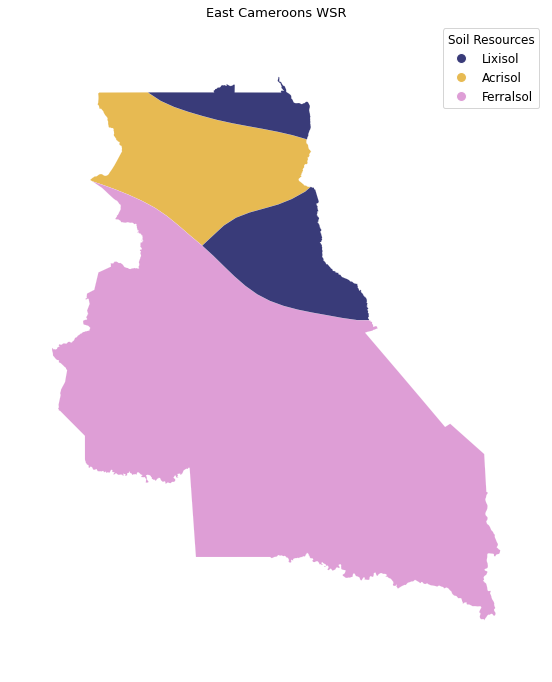

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(df_ecwsr['mg_code'], k=3)
 
 #Map
gplt.choropleth(df_ecwsr, 
    hue="mg_code", 
    linewidth=.1,
    scheme=scheme, 
    cmap='tab20b',
    legend_labels=["Lixisol", "Acrisol", "Ferralsol"],
    legend_kwargs={"loc":"best","fontsize": "large", "title":"Soil Resources", "title_fontsize":"large"},
    legend=True,
    edgecolor='white',
    ax=ax
);

ax.set_title('East Cameroon''s WSR', fontsize=13);

# **Agricultural activities of East Cameroon**

Soil types are highly variable in the tropics and are the result of a combination of several variables such as climate, vegetation, topographic position, parent material, and soil age. East Cameroon has three soils: Acrisol, Ferralsol and Lixisol. 

The soil of the East is predominantly ferrallitic, rich with iron and red in colour. The southern three quarters of the region consists of metamorphic rock such as gneiss, schist, mica, and migmatite. Starting at about the level of Bertoua and going north, however, granite becomes the dominate soil component. While the region supports an abundance of plant life, it is not particularly fertile due to leaching caused by the humid environment. Eastern dirt hardens quickly in the sun, and it is often used as a building material by poorer inhabitants.

The vast majority of the inhabitants of the region are subsistence farmers. Major crops are plantains south of Bertoua and Batouri and maize north of there. Farmers also raise many other crops in smaller quantities, including bananas, groundnuts, cocoyams, manioc, pineapples, oranges, mangoes, and yams. The dense forest and presence of the tsetse fly prohibits much cattle raising, but various livestock are raised for subsistence purposes, including pigs, sheep, goats, ducks, and chickens, as well as horses and donkeys in the extreme northeast. The Livestock Development Exploitation Organisation also runs a modern cattle ranch at Ndokayo in the province's northeast.

Farms are mostly small-scale affairs planted in clearings in the forest. Farmers clear an area during the dry season using traditional implements such as axes and machetes. The area is then burned, with care taken to preserve fruit trees such as mangoes or plums. At the start of the wet season, spices and common vegetables are planted close to the home and tubers, such as cocoyams and manioc, are placed with plantains in larger plots farther afield. Farmyard manure is used as fertiliser. Crops are then harvested at the beginning of the next dry season.

This method of slash-and-burn agriculture allows for high yields in the short term, but quickly exhausts the soil. Farms are thus moved every two to three years, and land must remain fallow for up to ten years once it has been drained in this way. With the East's low population density, however, this generally presents little problem.

Commercial crops also exist. Cocoa and coffee are raised for profit in the areas of Abong-Mbang, Bertoua, and Yokadouma, as well as in the heavy forests south of these areas. Tobacco is grown in the plains north of Batouri. No large-scale commercial livestock exists in the East, though cattle from the northern regions of Cameroon are herded through the province on their way to market in Yaoundé.

In [132]:
# Downloading and displaying East Cameroon's Managed Forest Concessions
url4 = "https://datasets.mojaglobal.workers.dev/0:/LandCover/Forest/ManagedForestConcessions/ManagedForestConcessions_CMR.geojson"

a=requests.get(url4).content

df_ecmfc = gpd.read_file(io.StringIO(a.decode('utf-8')))
df_ecmfc

,id,OBJECTID,country,name,company,group_comp,group_coun,legal_term,status,province,source,last_updat,Shape_Leng,AREA_GEO,Shape_Length,Shape_Area,geometry
0,386,386,CMR,Akom II-Efoulan,,,,logging concession,Classee,,"MINFOF, 2013",2014,0.759360,1.718038e+08,0.759360,0.013976,"POLYGON ((10.63960 3.07459, 10.63933 3.07436, ..."
1,387,387,CMR,Ambam,,,,logging concession,Transmission du dossier au PM,,"MINFOF, 2013",2014,1.404953,2.988743e+08,1.404953,0.024304,"POLYGON ((11.20291 2.68179, 11.20273 2.68248, ..."
2,388,388,CMR,Ambam,,,,logging concession,Transmission du dossier au PM,,"MINFOF, 2013",2014,0.701858,1.470066e+08,0.701858,0.011953,"POLYGON ((11.37341 2.45379, 11.33363 2.45279, ..."
3,389,389,CMR,Angossas,,,,logging concession,Avis au public,,"MINFOF, 2013",2014,0.315127,8.150673e+07,0.315127,0.006638,"POLYGON ((12.90395 4.13860, 12.89730 4.13867, ..."
4,390,390,CMR,Angossas,,,,logging concession,Avis au public,,"MINFOF, 2013",2014,0.594981,1.393271e+08,0.593769,0.011340,"POLYGON ((13.10420 4.20681, 13.08735 4.21757, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1745,1745,CMR,10-018,STBK,ALPI,,logging concession,AttribuM,Est,"MINFOF, 2013",2014,2.056240,8.098089e+08,2.056240,0.065875,"POLYGON ((15.01462 3.19060, 15.01504 3.19115, ..."
191,1782,1782,CMR,08-003,STJJY,NA,,logging concession,AttribuM,Centre,"MINFOF, 2013",2014,1.349541,4.534683e+08,1.349541,0.037013,"POLYGON ((11.46249 5.73165, 11.46300 5.73201, ..."
192,1824,1824,CMR,11-001,TRC,REEF,,logging concession,AttribuM,Sud Ouest,"MINFOF, 2013",2014,1.789692,5.543195e+08,1.788506,0.045235,"POLYGON ((9.11814 5.62797, 9.11809 5.62876, 9...."
193,1825,1825,CMR,00-004,TRC,TRC,,logging concession,Attribuc,Littoral/Centre,"MINFOF, 2013",2014,1.584890,9.493967e+08,1.584063,0.077145,"POLYGON ((10.46196 4.74574, 10.46132 4.74599, ..."


In [ ]:
df_ecmfc1 = pd.merge(df_ecbo, df_ecmfc, how='outer', on = 'geometry')
df_ecmfc1

In [141]:
df_ecmfc2 = df_ecmfc1.loc[df_ecmfc1['province'] == 'Est'] 
df_ecmfc2 = pd.merge(df_ecbo, df_ecmfc2, how='outer', on = 'geometry')

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:67: UserWarning:

The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.



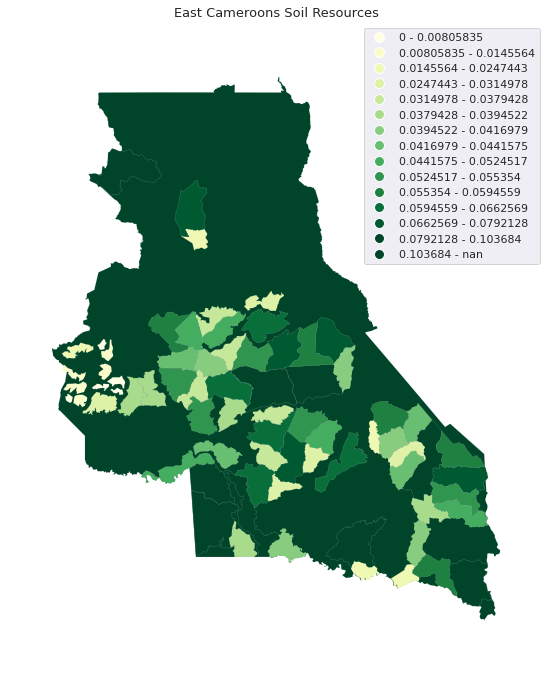

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(df_ecmfc2['Shape_Area'], k=15)
 
 #Map
gplt.choropleth(df_ecmfc2, 
    hue="Shape_Area", 
    linewidth=.1,
    scheme=scheme, cmap='YlGn',
    legend=True,
    edgecolor='white',
    ax=ax
);

ax.set_title('East Cameroon''s Soil Resources', fontsize=13);

In [143]:
#bins = list(df_ecgez["gez_code"].quantile([0, 0.03, 0.06, 0.11, 0.12]))
m = folium.Map(location=[4, 14], zoom_start=8)

folium.Choropleth(
    geo_data=df_ecmfc2,
    name = "chloropleth",
    data=df_ecmfc1,
    columns=["Shape_Area","Shape_Leng"],
    #key_on="feature.id",
    fill_color="Greens",
    fill_opacity=0.5,
    line_opacity=2.5,
    legend_name="EC GEZ",
    #bins=bins,
    #reset=True,
).add_to(m)

m




Forest concessions are an important instrument used for allocating public forests to a private entity. It is used as a contract to establish the rights to harvest in a given forest area and regulate responsibilities, prices, incentives and sanctions of the government and the concession holder. Most typically, forest concessions are granted to companies, but there are also cases of concessions granted to communities.


Cameroon has the second highest deforestation rate amongst all Congo Basin countries; only the Democratic Republic of Congo deforests more per year than Cameroon. Since 1990, Cameroon’s forest sector has increased its logging activities, which now contributes around six percent of its GDP.

Efforts to protect and conserve tropical rainforest habitats are diverse and widespread. Tropical rainforest conservation ranges from strict preservation of habitat to finding sustainable management techniques for people living in tropical rainforests. International policy has also introduced a market incentive program called Reducing Emissions from Deforestation and Forest Degradation (REDD) for companies and governments to outset their carbon emissions through financial investments into rainforest conservation


Although Cameroon has taken measurable steps to improve local forest policy and governance in the country to manage its high rate of deforestation, illegal logging continues to be a major concern in the country and is frequently documented at various stages along the local supply chain. Cameroon passed its first forestry law in 1994, and has made a vested effort to keep implementation and enforcement actions under one ministry - the Ministry of Forests and Fauna (MINFOF).